In [1]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages')

In [2]:
import numpy as np
import numpy.random as rnd
import random
import math
import matplotlib.pyplot as plt

In [3]:
def comb(x):
    num_vectors = 0;    
    subtracter = 1;
    while (subtracter < (x-1)):
        num_vectors = num_vectors + math.floor((x-subtracter)/2);
        subtracter = subtracter + 1;
        
    return num_vectors

In [185]:
def combfloor3(x):
    return math.floor(comb(x)/3)*3

In [4]:
def combfloor5(x):
    return math.floor(comb(x)/5)*5

In [100]:
def ceil5(x):
    return math.ceil(x/5)*5

In [198]:
x = 4
print(comb(x))
print(combfloor3(x))

2
0


In [89]:
# formula for number of generations (xors) : sv*tc/combfloor5(sv)
# This is because we need tc=238 total unique combinations during the entire classification. 
# For sv stored vectors, we can generate combfloor5(sv) unique combinations. 
# We need to do combfloor5(sv) = floor(comb(sv)/5)*5 because eg. if we have 36 unique combinations from sv=13 vectors,
# we can always only do 5 at a time, so we will only use the first 35, and discard the last one.
# So now we have tc/combfloor5(sv) total blocks of computation, and for each block, we need to generate sv vectors

# formula for total number of cycles: [combfloor5(sv)/5+c][tc/combfloor5(sv)]
# First we can split the total tc combinations we need into groups of size tc/combfloor5(sv)
# To generate each block of tc/combfloor5(sv), we need combfloor5(sv)/5 cycles to go through all of
# the necessary combinations. This is because we process 5 combinations in one clock cycle (hence dividing by 5),
# and the total combinations we use is the nearest multiple of 5 below the total combinations we get from sv vectors,
# discarding the last few if needed.
# We then also need c cycles to process the last (usually 6) cycles where we are only generating new vectors,
# and not doing any useful work processing modality channels.
# This equation can be simplified to tc/m + c(tc/combfloor5(sv)).
# To be more exact, it would be tc/m + c[tc/combfloor5(sv)-1] because we don't need to generate the last
# remaining c batch of vectors, because we wouldn't need any more vectors after the last round.
# tc/m should be ceil(tc/m) because eg. if tc=238, 238/5=47.6, which means 47.6 cycles, but the last 48th
# cycle will process the remainder 238%5=3 amount of channels left over.

In [202]:
# Define constants
tc = 214 # total channels
m = 3    # number of modalities
c = 6    # constant, how many additional vectors we need to generate

In [205]:
def vecgen_to_cyclecount_ratio(sv):
    num_vectors_generated = sv * tc / combfloor5(sv)
    num_working_cycles = math.ceil(tc / m)
    num_extra_cycles = c * ((tc / combfloor5(sv)) - 1)
    
    return num_vectors_generated / (num_working_cycles + num_extra_cycles)

In [215]:
def get_num_vectors_generated_AMIGOS(sv):
    return sv * tc / combfloor3(sv)

In [212]:
def get_num_vectors_generated_DEAP(sv):
    return sv * tc / combfloor5(sv)

In [207]:
def get_total_cycles(sv):
    num_working_cycles = math.ceil(tc / m)
    num_extra_cycles = c * ((tc / combfloor5(sv)) - 1)
    
    return num_working_cycles + num_extra_cycles

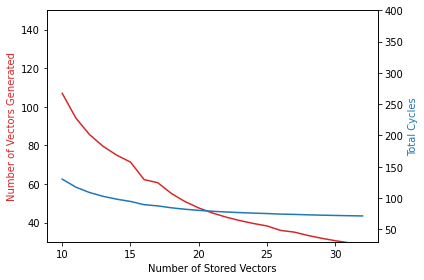

In [219]:
x = np.arange(10,33)
y1 = [get_num_vectors_generated_DEAP(i) for i in x]
y2 = [get_total_cycles(i) for i in x]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Number of Stored Vectors")
ax1.set_ylabel("Number of Vectors Generated", color=color)
ax1.plot(x, y1, color=color)
ax1.set_ylim(30,150)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel("Total Cycles", color=color)
ax2.plot(x,y2, color=color)
ax2.set_ylim(30,400)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

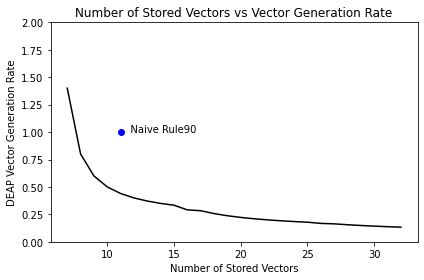

In [220]:
x = np.arange(7,33)
y = [get_num_vectors_generated_DEAP(i)/tc for i in x]

fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel("Number of Stored Vectors")
ax1.set_ylabel("DEAP Vector Generation Rate", color=color)
ax1.set_title("Number of Stored Vectors vs Vector Generation Rate")
plt.plot(11, 1, 'bo')
plt.annotate("   Naive Rule90", (11, 1))
ax1.plot(x, y, color=color)
ax1.set_ylim(0,2)

fig.tight_layout()
plt.show()

In [223]:
x = np.arange(7,33)
y = [get_num_vectors_generated_DEAP(i)/tc for i in x]

In [224]:
print(x)

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32]


In [225]:
print(y)

[1.4000000000000001, 0.7999999999999999, 0.6, 0.5, 0.44, 0.39999999999999997, 0.3714285714285714, 0.35000000000000003, 0.3333333333333333, 0.29090909090909095, 0.2833333333333333, 0.2571428571428572, 0.23750000000000002, 0.22222222222222224, 0.21, 0.19999999999999998, 0.19166666666666665, 0.18461538461538463, 0.17857142857142858, 0.16774193548387098, 0.16363636363636364, 0.15555555555555556, 0.14871794871794872, 0.14285714285714288, 0.13777777777777778, 0.13333333333333333]


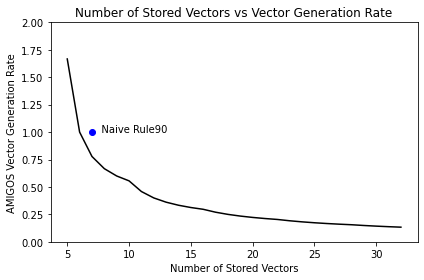

In [226]:
x = np.arange(5,33)
y = [get_num_vectors_generated_AMIGOS(i)/214 for i in x]

fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel("Number of Stored Vectors")
ax1.set_ylabel("AMIGOS Vector Generation Rate", color=color)
ax1.set_title("Number of Stored Vectors vs Vector Generation Rate")
plt.plot(7, 1, 'bo')
plt.annotate("   Naive Rule90", (7, 1))
ax1.plot(x, y, color=color)
ax1.set_ylim(0,2)

fig.tight_layout()
plt.show()

In [227]:
print(x)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32]


In [228]:
print(y)

[1.6666666666666667, 1.0, 0.7777777777777778, 0.6666666666666666, 0.6, 0.5555555555555556, 0.4583333333333333, 0.39999999999999997, 0.3611111111111111, 0.3333333333333333, 0.3125, 0.2962962962962963, 0.2698412698412698, 0.25, 0.23456790123456792, 0.22222222222222224, 0.2121212121212121, 0.20370370370370372, 0.19166666666666665, 0.1818181818181818, 0.1736111111111111, 0.16666666666666666, 0.16071428571428573, 0.15555555555555556, 0.14871794871794872, 0.14285714285714288, 0.13777777777777778, 0.13333333333333333]
